In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [3]:
(df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3376779085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)
C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3376779085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["spoj","odkud","kam"])['cena'].max() / df.groupby(["spoj","odkud","kam"])['cena'].min()).dropna().nlargest(100)


spoj         odkud                      kam              
LE ne 10:58  Praha hl.n.                Ostrava hl.n.        7.767677
                                        Ostrava-Svinov       7.767677
LE pá 19:59  Pardubice hl.n.            Košice               6.150502
ČD ne 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD pá 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
ČD pá 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD so 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
ČD so 17:16  Berlin Hbf (tief)          Praha hl.n.          5.612403
ČD út 06:28  Praha hl.n.                Berlin Hbf (tief)    5.612403
LE čt 13:58  Praha hl.n.                Ostrava hl.n.        5.581006
LE čt 14:59  Pardubice hl.n.            Košice               5.516129
LE čt 13:58  Praha hl.n.                Ostrava-Svinov       5.413408
LE st 22:53  Košice                     Pardubice hl.n.      5.200627
LE so 14:59  Pardubice hl.n.    

In [7]:
(df.groupby(["odjezd","odkud","kam"])['cena'].max() / df.groupby(["odjezd","odkud","kam"])['cena'].min()).dropna().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\2582829960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(["odjezd","odkud","kam"])['cena'].max() / df.groupby(["odjezd","odkud","kam"])['cena'].min()).dropna().nlargest(100)


odjezd               odkud                      kam                
2024-11-12 06:28:00  Praha hl.n.                Berlin Hbf (tief)      5.612403
2024-11-20 22:53:00  Košice                     Pardubice hl.n.        5.200627
2024-11-21 03:56:00  Ostrava hl.n.              Praha hl.n.            5.020101
2024-11-21 04:03:00  Ostrava-Svinov             Praha hl.n.            5.020101
2024-11-10 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-11 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-12 17:16:00  Berlin Hbf (tief)          Praha hl.n.            3.932817
2024-11-19 06:28:00  Praha hl.n.                Berlin Hbf (tief)      3.932817
2024-11-30 13:19:00  Warszawa Centralna         Praha hl.n.            3.891837
2024-11-16 19:10:00  Wien Hbf                   Praha hl.n.            3.633075
2024-11-23 06:44:00  Praha hl.n.                Wien Hbf               3.633075
2024-11-13 06:28:00  Praha hl.n.                Berl

In [29]:
df.groupby(["odjezd","kam"])['oscrapovano'].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\3677311969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["odjezd","kam"])['oscrapovano'].nunique().nlargest(50)

KeyboardInterrupt



In [27]:
df[(df['odjezd'] == '2024-11-21 15:10:00')].groupby(['prodejce','odkud'])['kam'].nunique().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_3404\272647092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[(df['odjezd'] == '2024-11-21 15:10:00')].groupby(['prodejce','odkud'])['kam'].nunique().nlargest(10)


prodejce  odkud                  
ČD        Ostrava hl.n.              2
          Berlin Hbf (tief)          1
          Brno hl.n.                 1
          Dresden Hbf                1
          Wien Hbf                   1
ARR       Amsterdam Bijlmer ArenA    0
          Amsterdam Centraal         0
          Amsterdam Zuid             0
          Bayerisch Eisenstein       0
          Berlin Baumschulenweg      0
Name: kam, dtype: int64

<Axes: xlabel='oscrapovano'>

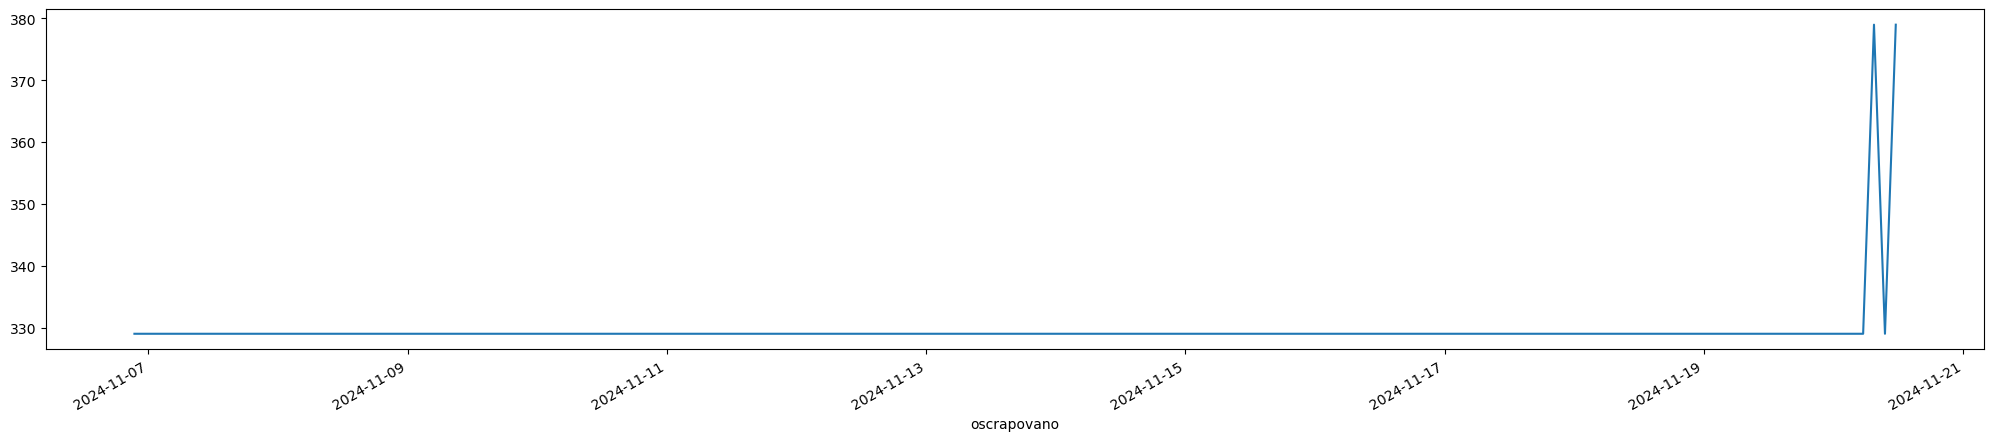

In [53]:
df[(df['odjezd'] == '2024-11-20 12:39:00') & (df['odkud'].str.contains('Brn')) & df['kam'].str.contains('Prah')].groupby('oscrapovano')['cena'].min().plot(figsize=(25,5))

In [55]:
df[(df['odjezd'] == '2024-11-21 04:03:00')]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj
163485,2024-11-08 17:58:36,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,12 days 10:04:24,12,298.073333,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
190986,2024-11-09 07:55:11,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,11 days 20:07:49,11,284.130278,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
195400,2024-11-09 09:55:51,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,11 days 18:07:09,11,282.119167,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
199809,2024-11-09 11:57:56,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,11 days 16:05:04,11,280.084444,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
213342,2024-11-09 17:52:31,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,11 days 10:10:29,11,274.174722,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
215567,2024-11-09 18:20:26,LE,Ostrava-Svinov,Praha hl.n.,2024-11-21 04:03:00,11 days 09:42:34,11,273.709444,199.0,None,48.0,None,205.0,351.0,None,None,čt,0,[LE1250],None,None,21.0,16.0,6.0,5.0,LE čt 04:03
239246,2024-11-10 09:53:03,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,10 days 18:09:57,10,258.165833,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
251730,2024-11-10 15:54:14,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,10 days 12:08:46,10,252.146111,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
265580,2024-11-10 23:52:55,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,10 days 04:10:05,10,244.168056,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03
272009,2024-11-11 07:50:44,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-21 04:03:00,9 days 20:12:16,9,236.204444,369.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,čt,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 04:03


<Axes: xlabel='oscrapovano'>

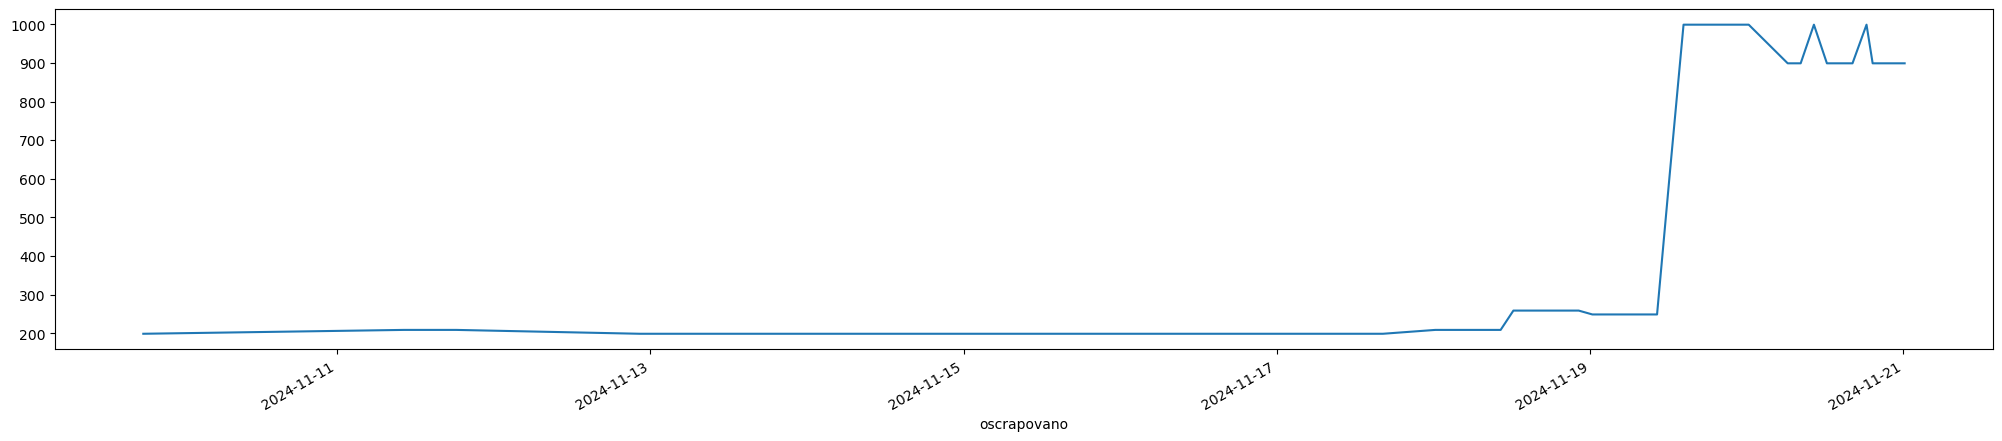

In [59]:
df[(df['odjezd'] == '2024-11-21 04:03:00') & (df['prodejce'] == 'LE')].groupby('oscrapovano')['cena'].min().plot(figsize=(25,5))

<Axes: xlabel='oscrapovano'>

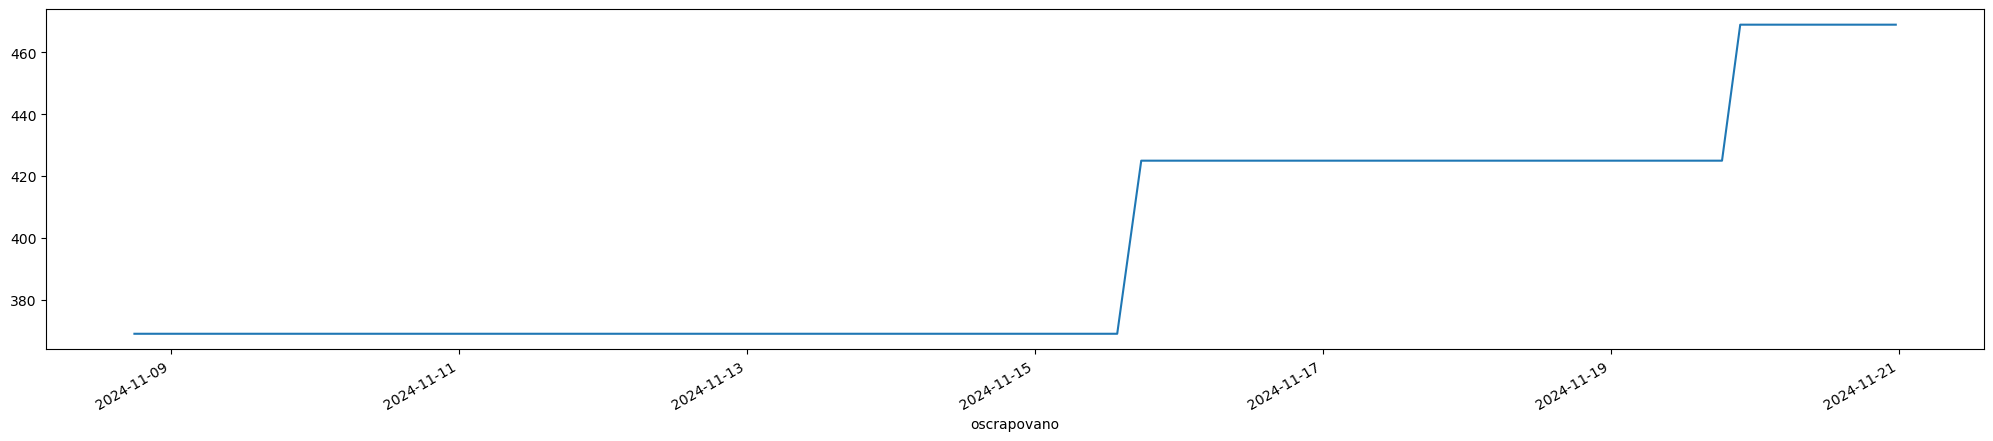

In [57]:
df[(df['odjezd'] == '2024-11-21 04:03:00') & (df['prodejce'] == 'ČD')].groupby('oscrapovano')['cena'].min().plot(figsize=(25,5))